**1.Importing Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**2.Dataset**

In [3]:
mat_ds = pd.read_csv("student-mat.csv", sep=';')
por_ds = pd.read_csv("student-por.csv", sep=';')

In [4]:
#merge both datasets
df = pd.concat([mat_ds,por_ds])

**3.Data Preprocessing**

In [5]:
# renaming the column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [6]:
# convert final_score to categorical variable 
# Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 

In [7]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

In [8]:
df.index.is_unique

False

In [9]:
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [10]:
df = df[~df.index.duplicated()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Student')

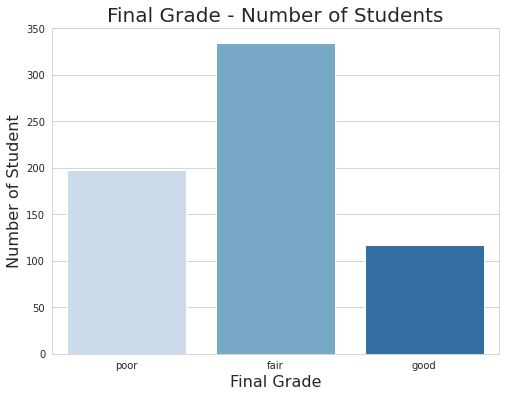

In [11]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Blues')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

**4.Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

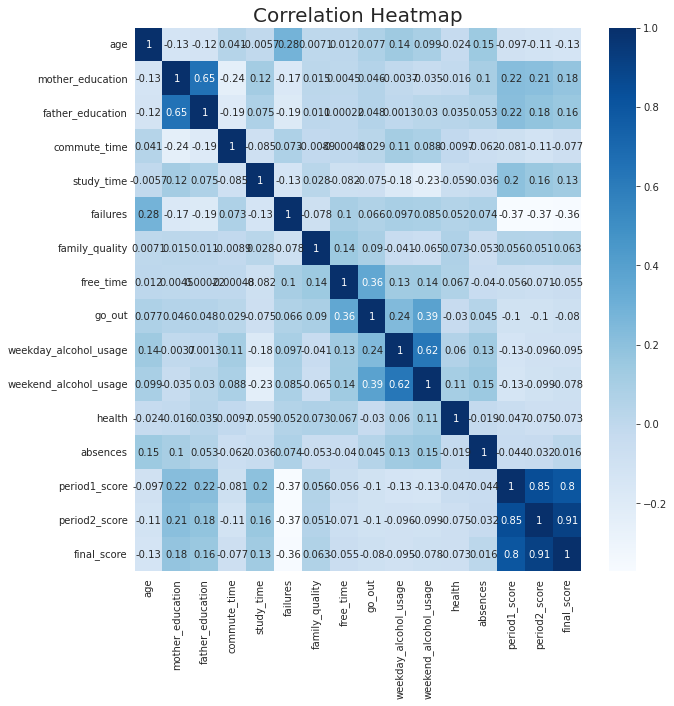

In [12]:
# see correlation between variables through a correlation heatmap
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

**5.Final Grade**

**5.1 Final Grade by Romantic Status**

<Figure size 432x288 with 0 Axes>

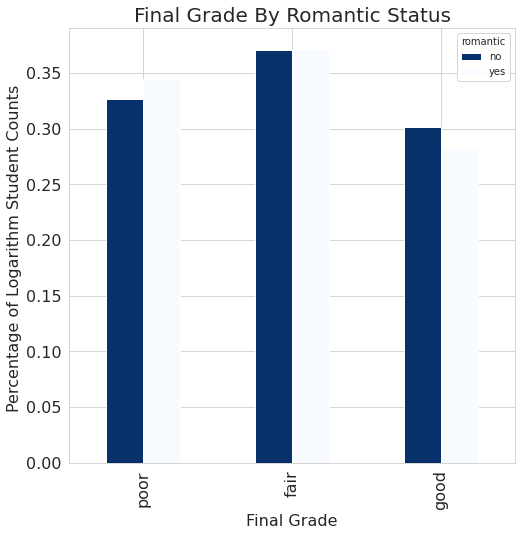

In [13]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
#plot
plt.figure()
romance_perc.plot.bar(colormap="Blues_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [14]:
# chi square test
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue


0.15076387887979004

Correlation Hypothesis Testing confirmed

**5.2 Final Grade by Alcohol Consumption**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'Level of Alcohol Consumption')

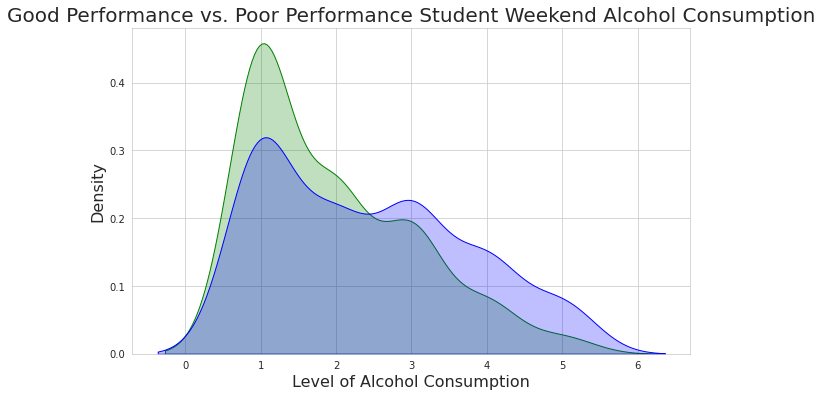

In [15]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

#plot
plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="g")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

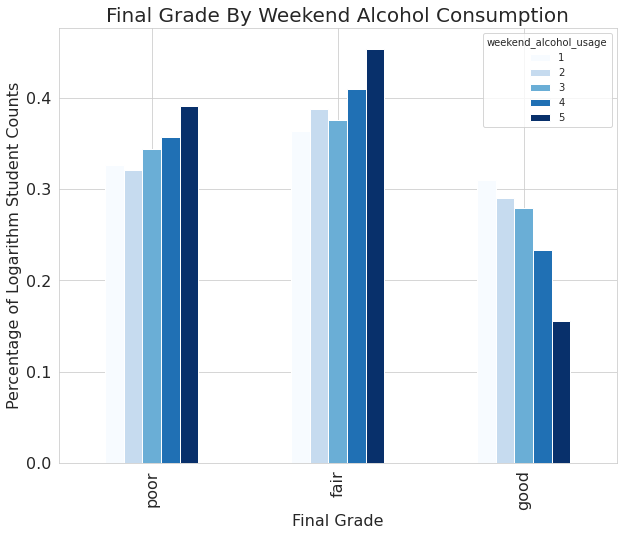

In [16]:
#plot bar graph
alc_perc.plot.bar(colormap="Blues", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [17]:
# chi-square test
import statsmodels.api as sm
alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.07040990295554583

Correlation Hypothesis Testing confirmed

**5.3 Final Grade by Parents Education Level**

In [18]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education
#removing duplicate index
df = df[~df.index.duplicated()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Text(0.5, 0, 'Mother Education Level')

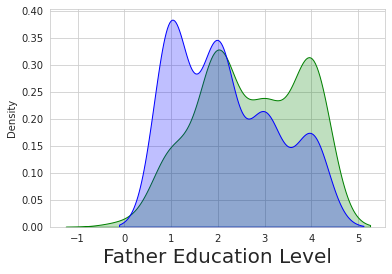

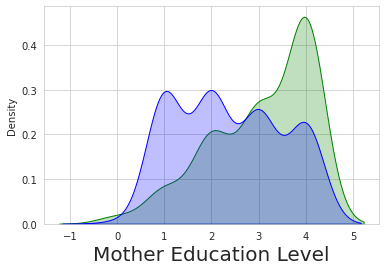

In [19]:
# see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="g")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")

plt.xlabel('Father Education Level', fontsize=20)

# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="g")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

In [20]:
# use OLS to see coefficients
X_edu = df[['mother_education','father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, X_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              1131.
Date:                Mon, 17 Jan 2022   Prob (F-statistic):                   5.79e-212
Time:                        12:46:03   Log-Likelihood:                         -2018.2
No. Observations:                 649   AIC:                                      4040.
Df Residuals:                     647   BIC:                                      4049.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.1663      0.222      9.756      0.000       1.730       2.602
father_education     1.6646      0.239      6.961      0.000       1.195       2.134
==============================================================================
Omnibus:                       30.591   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.643
Skew:                          -0.538   Prob(JB):                     4.95e-08
Kurtosis:                       3.293   Cond. No.                         5.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparatively, mother's education level has bigger influence than father's education level

**5.4 Final Grade by Frequency of Going Out**

Text(0.5, 0, 'Final Grade')

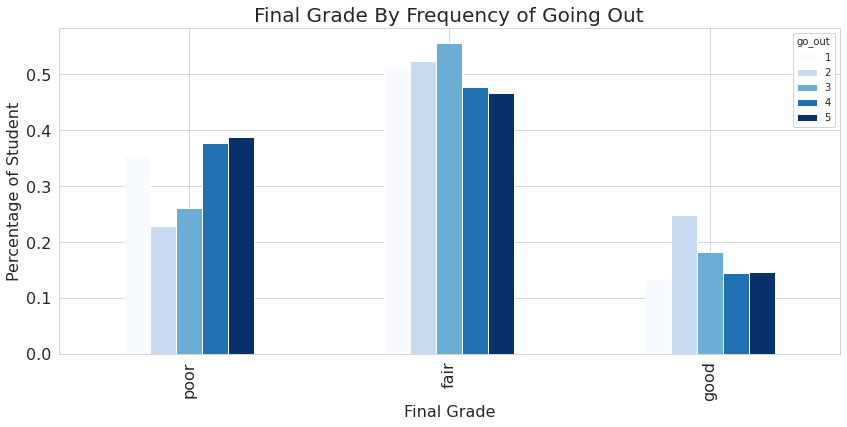

In [21]:
#(numeric: from 1 - very low to 5 - very high)
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="Blues", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [22]:
# chi-square test 
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

0.031793505342115225

Correlation Hypothesis Testing confirmed

**5.5 Final Grade by Desire to pursue Higher Education**

Text(0, 0.5, 'Percentage of Student')

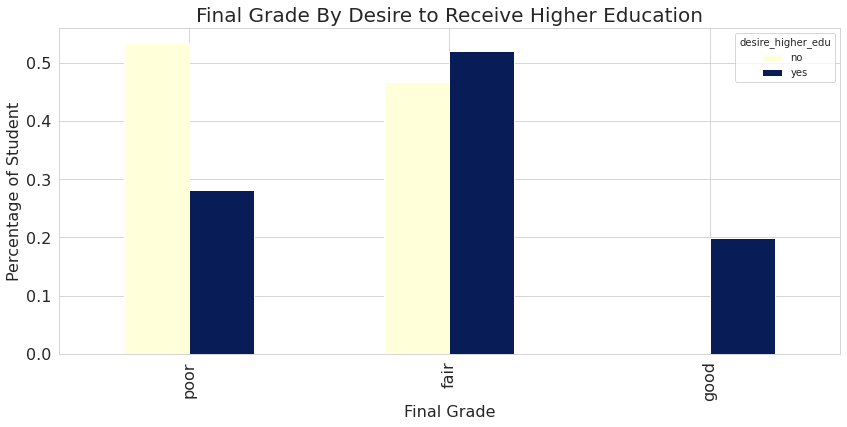

In [23]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

higher_perc.plot.bar(colormap="YlGnBu", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [24]:
# chi-square test
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

1.4211360431226616e-05

Correlation Hypothesis Testing confirmed

**5.6 Final Grade by Living Area**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


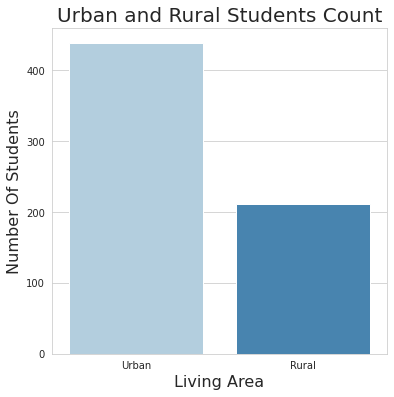

In [25]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

#count of students living in urban area vs rural
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='Blues')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

Text(0.5, 0, 'Final Grade')

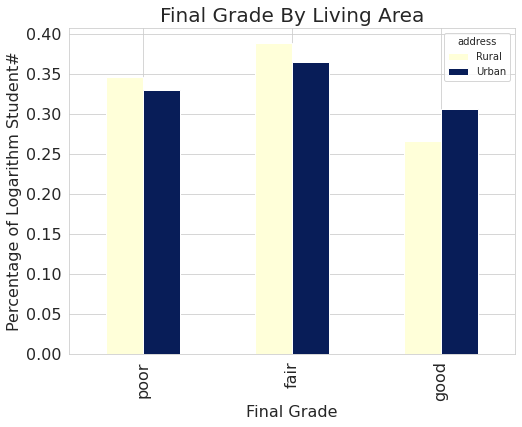

In [26]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

#plot
ad_perc.plot.bar(colormap="YlGnBu", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [27]:
# chi-square test
ad_table = sm.stats.Table(ad_tab1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

0.03194102783718211

Correlation Hypothesis Testing confirmed